In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [373]:
weatherHistory = pd.read_csv("weatherHistory.csv")

In [374]:
weatherHistory.shape

(96453, 12)

In [375]:
weatherHistory.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [376]:
weatherHistory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [377]:
weatherHistory.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature (C),96453.0,11.932678,9.551546,-21.822222,4.688889,12.0000,18.838889,39.905556
Apparent Temperature (C),96453.0,10.855029,10.696847,-27.716667,2.311111,12.0000,18.838889,39.344444
Humidity,96453.0,0.734899,0.195473,0.000000,0.600000,0.7800,0.890000,1.000000
Wind Speed (km/h),96453.0,10.810640,6.913571,0.000000,5.828200,9.9659,14.135800,63.852600
Wind Bearing (degrees),96453.0,187.509232,107.383428,0.000000,116.000000,180.0000,290.000000,359.000000
Visibility (km),96453.0,10.347325,4.192123,0.000000,8.339800,10.0464,14.812000,16.100000
Loud Cover,96453.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
Pressure (millibars),96453.0,1003.235956,116.969906,0.000000,1011.900000,1016.4500,1021.090000,1046.380000


In [378]:
# Extract 3 columns 'Temperature (C)','Apparent Temperature (C)', 'Humidity' for pure and better showing
weatherHistory_df = weatherHistory[['Temperature (C)','Apparent Temperature (C)', 'Humidity']]

# And called again
weatherHistory_df.columns = ['Temperature', 'Apparent_Temperature', 'Humidity']

In [379]:
weatherHistory_df = weatherHistory_df[:][:500]      # lets take limit for speed regression calculating
weatherHistory_df.head(2)

,Temperature,Apparent_Temperature,Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86


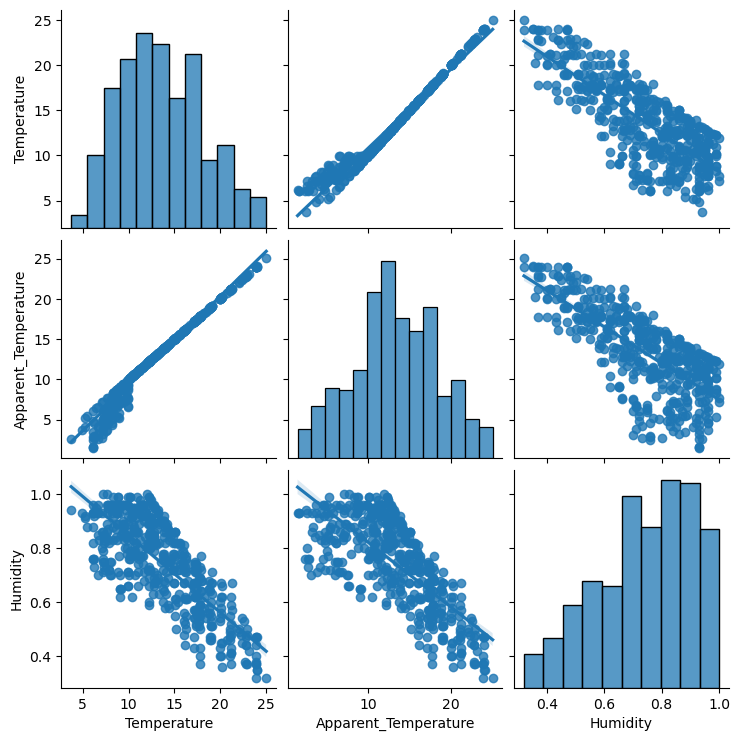

In [380]:
# See picture with scatter or plot method

sns.pairplot(weatherHistory_df, kind="reg")

In [381]:
weatherHistory_df.isnull().sum()

Temperature             0
Apparent_Temperature    0
Humidity                0
dtype: int64

In [382]:
x= np.array(weatherHistory_df['Apparent_Temperature']).reshape(-1, 1)
y = np.array(weatherHistory_df['Humidity']).reshape(-1, 1)

In [383]:
x.shape,y.shape

((500, 1), (500, 1))

In [384]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [385]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((400, 1), (100, 1), (400, 1), (100, 1))

In [386]:
lin_df = LinearRegression()  
lin_df.fit(x_train, y_train)

LinearRegression()

In [387]:
y_pred = lin_df.predict(x_test)                                     # Predict Linear Model
accuracy_score = lin_df.score(x_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 58.6%


In [388]:
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_pred)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score = ' + str(r2_score(y_test, y_pred)))

Mean absolute error = 0.08798530099071504
Mean squared error = 0.011213097936505228
Root Mean squared error = 0.10589191629442367
R2 score = 0.585896375784577


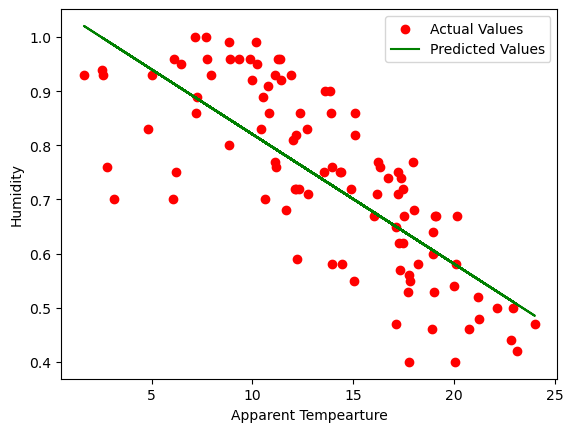

In [389]:
# Finally draw figure of Linear Regression Model

plt.scatter(x_test, y_test, color='r',label='Actual Values')
plt.plot(x_test, y_pred, color='g',label='Predicted Values')
plt.xlabel('Apparent Tempearture')
plt.ylabel('Humidity')
plt.legend()
plt.show()

# Multiple Linear Regression

In [390]:
x = weatherHistory_df.drop(columns=['Humidity'])
y = weatherHistory_df['Humidity'].values.astype('float').reshape(-1,1)


In [391]:
x

,Temperature,Apparent_Temperature
0,9.472222,7.388889
1,9.355556,7.227778
2,9.377778,9.377778
3,8.288889,5.944444
4,8.755556,6.977778
...,...,...
495,21.177778,21.177778
496,21.227778,21.227778
497,20.100000,20.100000
498,19.027778,19.027778


In [392]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [393]:
mlin_df = LinearRegression()
mlin_df = mlin_df.fit(x_train, y_train)
mlin_df.intercept_       # constant b0


array([1.21666094])

In [394]:
mlin_df.coef_            # variable coefficient

array([[-0.07479968,  0.04131709]])

In [395]:
y_pred = mlin_df.predict(x_test)                                     # Predict Linear Model
accuracy_score = mlin_df.score(x_test, y_test)  
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_pred)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_pred)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_pred))))
print('R2 score = ' + str(r2_score(y_test, y_pred)))

Mean absolute error = 0.07555854326917352
Mean squared error = 0.008387437418538262
Root Mean squared error = 0.09158295375526093
R2 score = 0.6902490058889778


In [396]:
print(x_test.shape)  # Output: (n, 1)
print(y_pred.shape)  # Output: (n, 1)

(100, 2)
(100, 1)


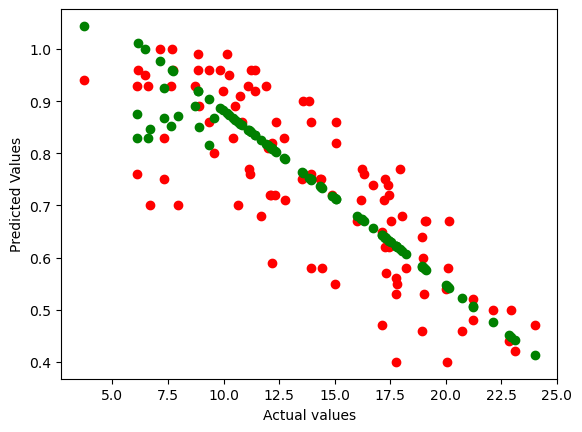

In [397]:
x_test_array = np.array(x_test)
#plt.scatter(x_test, y_pred, color='r')
plt.scatter(x_test_array[:, 0], y_test, color='r',label= 'actual')
plt.scatter(x_test_array[:, 0], y_pred, color='g',label='pred')
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')

plt.show()


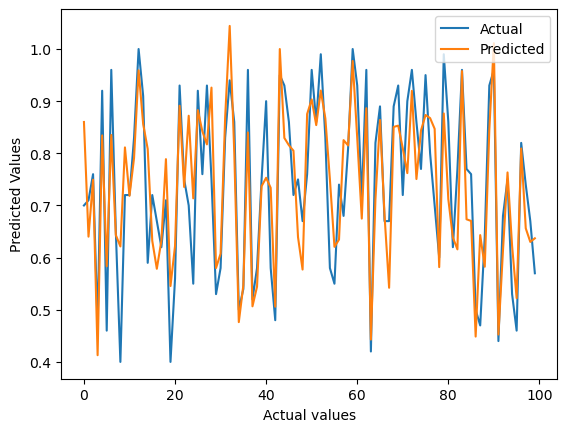

In [398]:
plt.plot(y_test,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

# Decision tree


In [399]:
y = np.array(weatherHistory_df['Humidity']).reshape(-1, 1)
x= np.array(weatherHistory_df['Apparent_Temperature']).reshape(-1, 1)

In [400]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)

In [401]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=5)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.7452092141476259
0.5952832051852439
Mean absolute error = 0.08732048183829332
Mean squared error = 0.010958921369993968
Root Mean squared error = 0.10468486695790355
R2 score = 0.5952832051852439


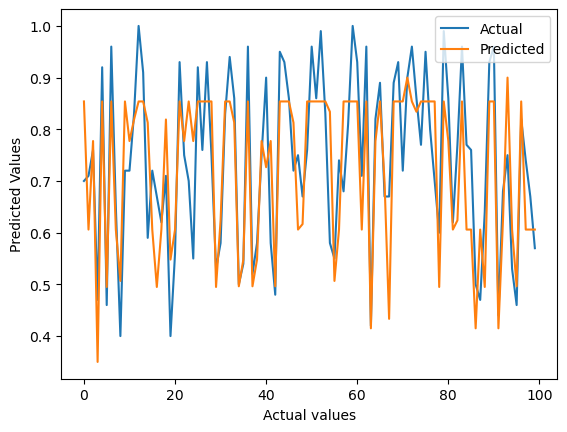

In [402]:

plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [403]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=10)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.8872187519790303
0.5407444448847627
Mean absolute error = 0.08677373902413375
Mean squared error = 0.012435721921410401
Root Mean squared error = 0.1115155680674694
R2 score = 0.5407444448847627


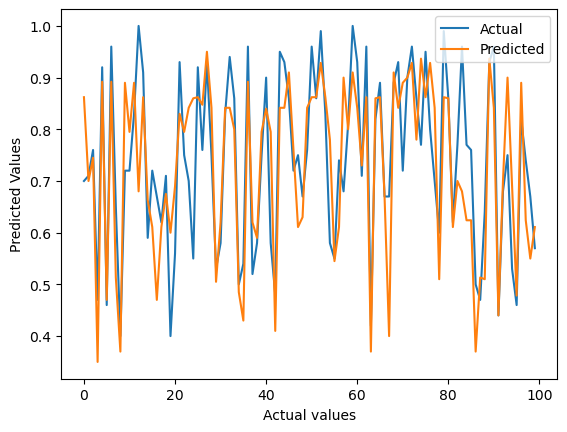

In [404]:

plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

In [405]:
dTree= DecisionTreeRegressor(criterion='mse',splitter='best',random_state=0,max_depth=15)
dTree.fit(x_train,y_train)
print(dTree.score(x_train,y_train)) 
print(dTree.score(x_test,y_test))
y_predicted = dTree.predict(x_test)
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))

0.948740048238087
0.4675513108071676
Mean absolute error = 0.08957666666666668
Mean squared error = 0.014417645605963519
Root Mean squared error = 0.12007350084828675
R2 score = 0.4675513108071676


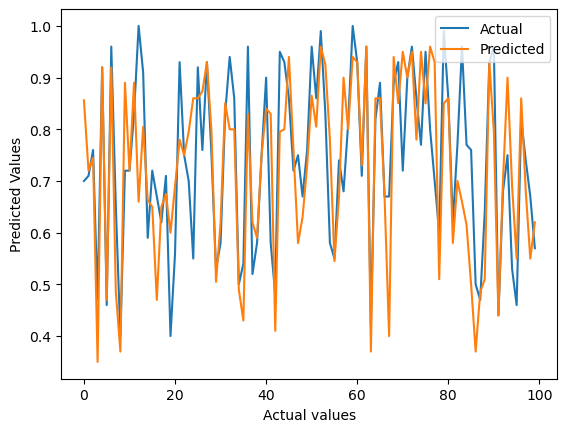

In [406]:

plt.plot(y_test,label='Actual')
plt.plot(y_predicted,label='Predicted')
plt.legend(loc="upper right")
plt.xlabel('Actual values')
plt.ylabel('Predicted Values')
plt.show()

# LSTM

In [407]:
y = np.array(weatherHistory_df['Humidity']).reshape(-1, 1)
x= np.array(weatherHistory_df['Apparent_Temperature']).reshape(-1, 1)

In [408]:
x_train_mean = x_train.mean()
x_train_std = x_train.std()
y_train_mean = y_train.mean()
y_train_std = y_train.std()
x_train = (x_train - x_train_mean) / x_train_std
y_train = (y_train - y_train_mean) / y_train_std
x_test = (x_test - x_train_mean) / x_train_std
y_test = (y_test - y_train_mean) / y_train_std
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [409]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x_train.shape[1], 1), activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs=50, batch_size=30, verbose=1,validation_split=0.2)

Epoch 1/50
11/11 [==============================] - 4s 73ms/step - loss: 0.9306 - val_loss: 1.1612
Epoch 2/50
11/11 [==============================] - 0s 9ms/step - loss: 0.9036 - val_loss: 1.1231
Epoch 3/50
11/11 [==============================] - 0s 10ms/step - loss: 0.8758 - val_loss: 1.0852
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 0.8484 - val_loss: 1.0456
Epoch 5/50
11/11 [==============================] - 0s 9ms/step - loss: 0.8207 - val_loss: 1.0039
Epoch 6/50
11/11 [==============================] - 0s 9ms/step - loss: 0.7917 - val_loss: 0.9605
Epoch 7/50
11/11 [==============================] - 0s 11ms/step - loss: 0.7623 - val_loss: 0.9135
Epoch 8/50
11/11 [==============================] - 0s 11ms/step - loss: 0.7290 - val_loss: 0.8662
Epoch 9/50
11/11 [==============================] - 0s 10ms/step - loss: 0.6967 - val_loss: 0.8150
Epoch 10/50
11/11 [==============================] - 0s 9ms/step - loss: 0.6628 - val_loss: 0.7621
Epoch 11/50
1

4/4 [==============================] - 1s 1ms/step
Mean absolute error = 0.08355710723400116
Mean squared error = 0.009705080431769951
Root Mean squared error = 0.09851436662624366
R2 score = 0.6415879890771125


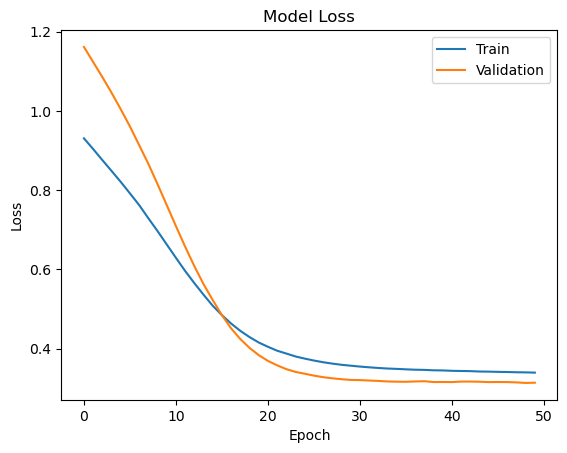

In [410]:
y_predicted = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)).flatten() * y_train_std + y_train_mean
y_test = y_test * y_train_std + y_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [411]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x_train.shape[1], 1),activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs=50, batch_size=60, verbose=1, validation_split=0.2)

Epoch 1/50
6/6 [==============================] - 4s 117ms/step - loss: 0.9512 - val_loss: 1.1942
Epoch 2/50
6/6 [==============================] - 0s 13ms/step - loss: 0.9364 - val_loss: 1.1742
Epoch 3/50
6/6 [==============================] - 0s 13ms/step - loss: 0.9223 - val_loss: 1.1555
Epoch 4/50
6/6 [==============================] - 0s 17ms/step - loss: 0.9087 - val_loss: 1.1377
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.8962 - val_loss: 1.1201
Epoch 6/50
6/6 [==============================] - 0s 14ms/step - loss: 0.8837 - val_loss: 1.1028
Epoch 7/50
6/6 [==============================] - 0s 13ms/step - loss: 0.8718 - val_loss: 1.0857
Epoch 8/50
6/6 [==============================] - 0s 16ms/step - loss: 0.8606 - val_loss: 1.0682
Epoch 9/50
6/6 [==============================] - 0s 10ms/step - loss: 0.8481 - val_loss: 1.0508
Epoch 10/50
6/6 [==============================] - 0s 16ms/step - loss: 0.8360 - val_loss: 1.0328
Epoch 11/50
6/6 [===========

4/4 [==============================] - 0s 2ms/step
Mean absolute error = 0.14324621445094346
Mean squared error = 0.029092028980768157
Root Mean squared error = 0.17056385602104615
R2 score = -37.290644617563984


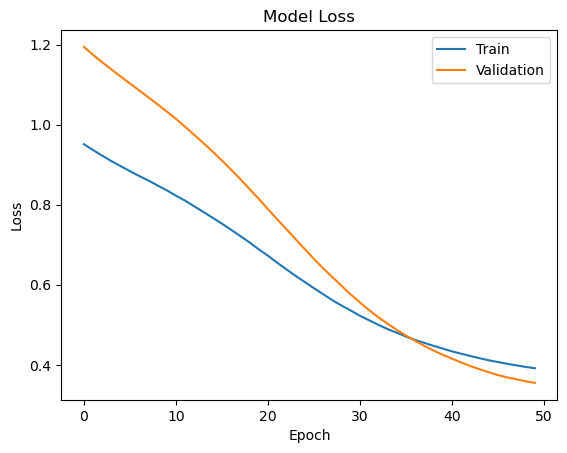

In [412]:
y_predicted = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)).flatten() * y_train_std + y_train_mean
y_test = y_test * y_train_std + y_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [413]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x_train.shape[1], 1),activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs=100, batch_size=30, verbose=1, validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 4s 46ms/step - loss: 0.9471 - val_loss: 1.1895
Epoch 2/100
11/11 [==============================] - 0s 6ms/step - loss: 0.9192 - val_loss: 1.1513
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 0.8926 - val_loss: 1.1144
Epoch 4/100
11/11 [==============================] - 0s 8ms/step - loss: 0.8658 - val_loss: 1.0789
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 0.8400 - val_loss: 1.0423
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 0.8140 - val_loss: 1.0045
Epoch 7/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7876 - val_loss: 0.9645
Epoch 8/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7602 - val_loss: 0.9241
Epoch 9/100
11/11 [==============================] - 0s 8ms/step - loss: 0.7338 - val_loss: 0.8814
Epoch 10/100
11/11 [==============================] - 0s 7ms/step - loss: 0.7032 - val_loss: 0.8409
Epoch 11

4/4 [==============================] - 0s 2ms/step
Mean absolute error = 0.16538130371026874
Mean squared error = 0.04571711126871009
Root Mean squared error = 0.21381560108820424
R2 score = -2143.5328196543837


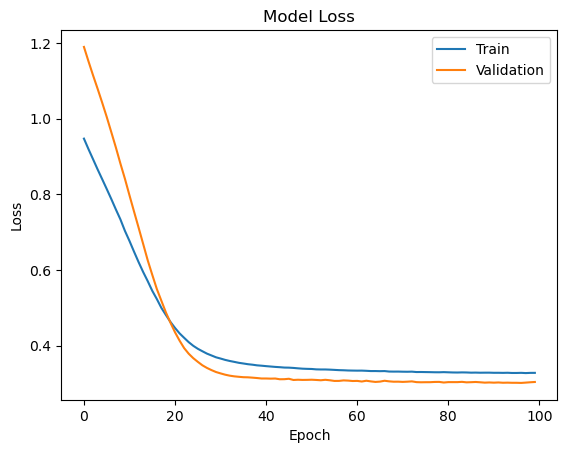

In [414]:
y_predicted = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)).flatten() * y_train_std + y_train_mean
y_test = y_test * y_train_std + y_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [415]:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(x_train.shape[1], 1),activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(x_train.reshape(x_train.shape[0], x_train.shape[1], 1), y_train, epochs=100, batch_size=60, verbose=1, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 4s 137ms/step - loss: 0.8809 - val_loss: 1.0897
Epoch 2/100
6/6 [==============================] - 0s 19ms/step - loss: 0.8625 - val_loss: 1.0631
Epoch 3/100
6/6 [==============================] - 0s 20ms/step - loss: 0.8435 - val_loss: 1.0370
Epoch 4/100
6/6 [==============================] - 0s 16ms/step - loss: 0.8253 - val_loss: 1.0110
Epoch 5/100
6/6 [==============================] - 0s 16ms/step - loss: 0.8083 - val_loss: 0.9846
Epoch 6/100
6/6 [==============================] - 0s 13ms/step - loss: 0.7898 - val_loss: 0.9587
Epoch 7/100
6/6 [==============================] - 0s 15ms/step - loss: 0.7724 - val_loss: 0.9321
Epoch 8/100
6/6 [==============================] - 0s 10ms/step - loss: 0.7536 - val_loss: 0.9065
Epoch 9/100
6/6 [==============================] - 0s 14ms/step - loss: 0.7364 - val_loss: 0.8801
Epoch 10/100
6/6 [==============================] - 0s 43ms/step - loss: 0.7183 - val_loss: 0.8533
Epoch 11/100
6/6 [

4/4 [==============================] - 1s 2ms/step
Mean absolute error = 0.16572093225241447
Mean squared error = 0.04550590559599581
Root Mean squared error = 0.21332113255839377
R2 score = -76076.6217642961


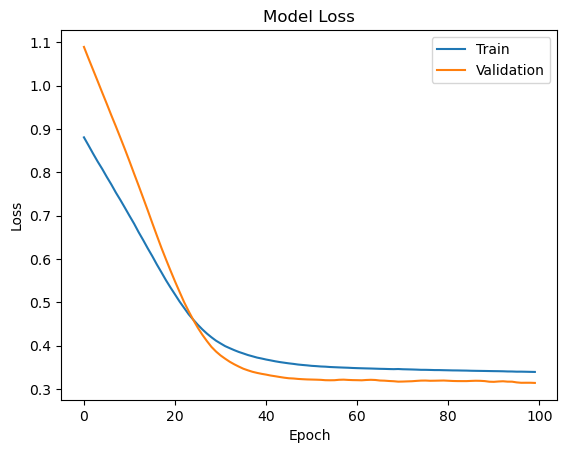

In [416]:
y_predicted = model.predict(x_test.reshape(x_test.shape[0], x_test.shape[1], 1)).flatten() * y_train_std + y_train_mean
y_test = y_test * y_train_std + y_train_mean
print('Mean absolute error = ' + str(mean_absolute_error(y_test, y_predicted)))
print('Mean squared error = ' + str(mean_squared_error(y_test, y_predicted)))
print('Root Mean squared error = ' + str(np.sqrt(mean_squared_error(y_test, y_predicted))))
print('R2 score = ' + str(r2_score(y_test, y_predicted)))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()